<a href="https://colab.research.google.com/github/Sindhura-tr/Machine-Learning-satsun-5-7/blob/main/Kmeans_Heirarchal_Clustering_5_7pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

## Evaluation metric for K-Means clustering => Inertia:
Sum of squared intra distances of respective cluster

Good model is the one which has lower inertia and lower number of clusters

# Hierarchal Clustering

## Linkages
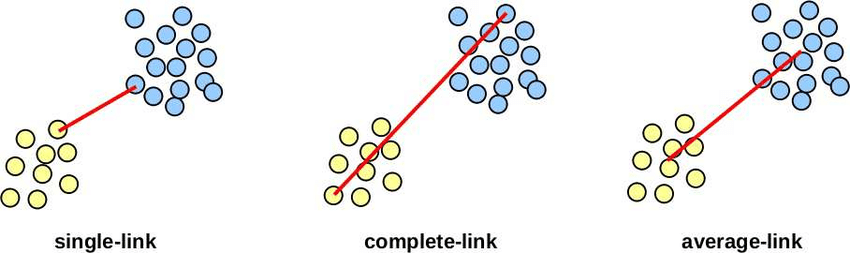

Single Linkages: calculate the minimum distance between datapoints of 2 clusters

Complete Linkages: calculate the maximum distance between datapoints of 2 clusters

Average Linkages: calculates the average distance of all datapoints between 2 clusters

Centroid Linkages: calculate the centroid distance between 2 clusters

## Evaluation metrics for Hierarchal clustering:

Silhoutte score: It is a measure which identifies how close the datapoint is, to its own cluster and  how far the datapoint if, from other cluster.

range of values: -1 to 1
higher the value/closer the value to 1 represents well matched datapoint to its own cluster.

lower the value/closer the value to -1 represents poor matched datapoint to its own cluster

In [1]:
%pip install yellowbrick

In [2]:
%pip install plotly nbformat

# Business statement: Create customer groups based on age,income and spending

In [3]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated data in this dataset

## Define X features => Age,Income,Spending

In [8]:
x = df.drop(columns=["CustomerID","Genre"])
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
x.columns= ["Age","Income","Score"]

In [10]:
x.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Preprocessing and Data cleaning

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform='pandas')

In [13]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [14]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## K-Means model

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

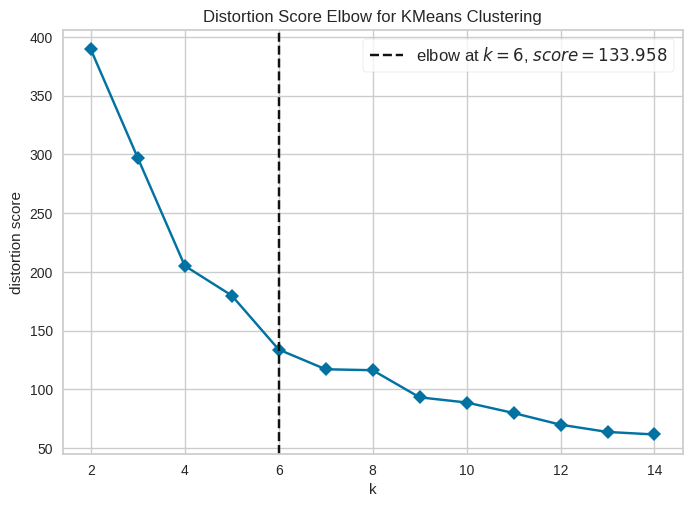

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,x_pre,k=(2,15),timings=False)
visualizer.show()

## From the above elbow graph, we can consider the optimal value of k as 6

In [17]:
best_model_kmeans = KMeans(n_clusters=6)
clusters= best_model_kmeans.fit_predict(x_pre)
clusters

array([3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3,
       4, 3, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 5, 0, 5, 0, 5, 0,
       2, 0, 2, 0, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0], dtype=int32)

In [18]:
best_model_kmeans.cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.90119708, -0.05954431, -0.20850019],
       [-0.97602698, -1.32549704,  1.0371827 ],
       [ 0.47895722, -1.30822992, -1.19644353],
       [ 0.36959845,  1.12879725, -1.25264236]])

In [19]:
x.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [20]:
x["cluster"] = clusters
x.head()

,Age,Income,Score,cluster
0,19,15,39,3
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [22]:
x[x["cluster"]==0]

,Age,Income,Score,cluster
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0
133,31,72,71,0
135,29,73,88,0
137,32,73,73,0
139,35,74,72,0
141,32,75,93,0


In [23]:
for i in range(6):
  print(f"Details of cluster {i}")
  display(x[x["cluster"]==i])
  print("------------------")

Details of cluster 0


,Age,Income,Score,cluster
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0
133,31,72,71,0
135,29,73,88,0
137,32,73,73,0
139,35,74,72,0
141,32,75,93,0


------------------
Details of cluster 1


,Age,Income,Score,cluster
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1


------------------
Details of cluster 2


,Age,Income,Score,cluster
47,27,40,47,2
48,29,40,42,2
49,31,40,42,2
51,33,42,60,2
52,31,43,54,2
58,27,46,51,2
61,19,46,55,2
65,18,48,59,2
68,19,48,59,2
69,32,48,47,2


------------------
Details of cluster 3


,Age,Income,Score,cluster
0,19,15,39,3
1,21,15,81,3
3,23,16,77,3
5,22,17,76,3
7,23,18,94,3
9,30,19,72,3
11,35,19,99,3
13,24,20,77,3
15,22,20,79,3
17,20,21,66,3


------------------
Details of cluster 4


,Age,Income,Score,cluster
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4


------------------
Details of cluster 5


,Age,Income,Score,cluster
126,43,71,35,5
128,59,71,11,5
130,47,71,9,5
136,44,73,7,5
140,57,75,5,5
146,48,77,36,5
148,34,78,22,5
150,43,78,17,5
152,44,78,20,5
154,47,78,16,5


------------------


In [24]:
best_model_kmeans.inertia_

134.30081710984643

In [25]:
centroids = x.groupby("cluster").mean(numeric_only=True)
centroids

,Age,Income,Score
cluster,,,
0,32.692308,86.538462,82.128205
1,56.333333,54.266667,49.066667
2,26.292683,59.000000,44.829268
3,25.250000,25.833333,76.916667
4,45.523810,26.285714,19.380952
5,44.000000,90.133333,17.933333


In [26]:
import plotly.express as px

In [28]:
fig = px.scatter_3d(data_frame=x,x="Age",y="Income",z="Score",color="cluster")
fig.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
base_model2 = AgglomerativeClustering()
base_model2.fit(x_pre)

AgglomerativeClustering()

In [30]:
lab = base_model2.labels_

In [31]:
lab

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [35]:
base_model3 = AgglomerativeClustering(n_clusters=3,linkage="ward")
base_model3.fit(x_pre)

AgglomerativeClustering(n_clusters=3)

In [36]:
lb2 = base_model3.labels_
lb2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [37]:
base_model4 = AgglomerativeClustering(n_clusters=3,linkage="complete")
base_model4.fit(x_pre)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [38]:
lb3 = base_model4.labels_
lb3

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [39]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_score(x_pre,lb2)

np.float64(0.32148866683112387)

In [42]:
silhouette_score(x_pre,lb3)

np.float64(0.28384379984299635)

In [44]:
n = list(range(2,15))
n

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [46]:
sil_scores = []
for i in n:
  # define the model
  model = AgglomerativeClustering(n_clusters=i)
  # fit the model
  model.fit(x_pre)
  # calculate labels and silhoutte score
  lb = model.labels_
  sil = silhouette_score(x_pre,lb)
  sil_scores.append(sil)
print(sil_scores)

[np.float64(0.31795733680759597), np.float64(0.32148866683112387), np.float64(0.3614512741691407), np.float64(0.39002826186267214), np.float64(0.4201169558789579), np.float64(0.3982948069934959), np.float64(0.36647935858620484), np.float64(0.3753854624760521), np.float64(0.3808885873908944), np.float64(0.38119813515480855), np.float64(0.3535716262087456), np.float64(0.35579016289204674), np.float64(0.35322985543969)]


## Plot silhoutte score graph

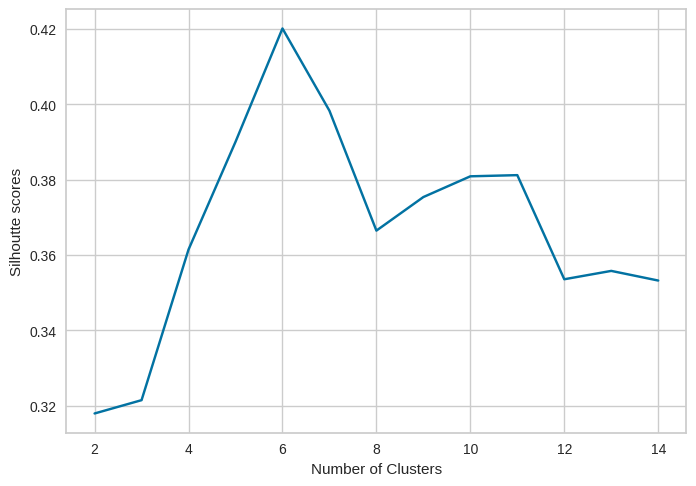

In [48]:
import matplotlib.pyplot as plt
plt.plot(n,sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte scores")
plt.show()

## Let's consider k=6 clusters for final model building

In [49]:
best_model_agg= AgglomerativeClustering(n_clusters=6)
best_model_agg.fit(x_pre)

AgglomerativeClustering(n_clusters=6)

In [50]:
labels = best_model_agg.labels_
labels

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [51]:
xnew = x.copy()
xnew

,Age,Income,Score,cluster
0,19,15,39,3
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,0
196,45,126,28,5
197,32,126,74,0
198,32,137,18,5


In [52]:
xnew["cluster_agg"] = labels
xnew.head()

,Age,Income,Score,cluster,cluster_agg
0,19,15,39,3,4
1,21,15,81,3,5
2,20,16,6,4,4
3,23,16,77,3,5
4,31,17,40,4,4


In [53]:
x.to_csv("KMeans Cluster Results.csv",index=False)
xnew.to_csv("Hierarchal Cluster Results.csv",index=False)